In [1]:
import numpy as np
import NUTS as hmc
import hmc as hmc2
import matplotlib.pyplot as plt
import corner
import time
import sklearn.datasets as skld

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-40,40),(-40,40),(-40,40)]
nparam = len(limits)

cov = skld.make_spd_matrix(nparam)
#cov = np.eye(nparam)
inv_cov = np.linalg.inv(cov)
print(cov)


[[ 0.4150568  -0.46213517 -0.24367774]
 [-0.46213517  2.58853341  1.21698721]
 [-0.24367774  1.21698721  1.05074376]]


In [3]:
def mock_posterior_and_gradient(p):
    grad = -p @ inv_cov
    #j = theory_jacobian(p, *self.args).T
    logP = 0.5 * grad @ p.T
    #logP_jacobian = j @ dlogL_dCl
    #logP_jacobian = p * (-1)
    #mock_posterior_and_gradient.counter += 1
    return logP, grad

In [4]:
def run_hmc(n_it, hmc, cov, burnin):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.NUTS(fid_params, 0.5, n_it, burnin)

    return sampler

In [5]:
def run_hmc2(n_it, epsilon, hmc, spit, cov):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, epsilon, spit, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    return sampler

In [6]:
nit = 10000
burnin = 500

start = time.time()
chain = run_hmc(nit, hmc, cov, burnin)
print("Total time to run is %.2f s" %(time.time()-start))
print("")

start = time.time()
#chain2 = run_hmc(nit, hmc, cov, burnin)
chain2 = run_hmc2(nit, 0.02, hmc2, 10, cov)
print("Total time to run is %.2f s" %(time.time()-start))

2.0
Reasonable epsilon is 2.0
final epsilon is 1.9354420203089209
Step 525 of 10500
Step 1050 of 10500
Step 1575 of 10500
Step 2100 of 10500
Step 2625 of 10500
Step 3150 of 10500
Step 3675 of 10500
Step 4200 of 10500
Step 4725 of 10500
Step 5250 of 10500
Step 5775 of 10500
Step 6300 of 10500
Step 6825 of 10500
Step 7350 of 10500
Step 7875 of 10500
Step 8400 of 10500
Step 8925 of 10500
Step 9450 of 10500
Step 9975 of 10500
Total time to run is 2.63 s

Accept 0 alpha=1.00  p=0.88  ΔH=0.000
Accept 500 alpha=1.00  p=0.62  ΔH=0.000
Accept 1000 alpha=1.00  p=0.01  ΔH=0.000
Accept 1500 alpha=1.00  p=0.84  ΔH=0.000
Accept 2000 alpha=1.00  p=0.44  ΔH=0.000
Accept 2500 alpha=1.00  p=0.85  ΔH=-0.000
Accept 3000 alpha=1.00  p=0.36  ΔH=-0.000
Accept 3500 alpha=1.00  p=0.18  ΔH=0.000
Accept 4000 alpha=1.00  p=0.01  ΔH=0.000
Accept 4500 alpha=1.00  p=0.92  ΔH=0.000
Accept 5000 alpha=1.00  p=0.23  ΔH=-0.000
Accept 5500 alpha=1.00  p=0.79  ΔH=0.000
Accept 6000 alpha=1.00  p=0.49  ΔH=-0.000
Accept 6500 

In [7]:
#paths = np.array(chain.paths)
#anti_paths = np.array(chain.anti_paths)

trace = np.array(chain.trace)
calls = np.array(chain.ncall_list)

#print(trace)

print(trace.shape)
print(calls.shape)

trace2 = np.array(chain2.trace)
calls2 = np.array(chain2.ncall_list)
print(trace2.shape)
print(calls2.shape)

(10499, 3)
(0,)
(10000, 3)
(10000,)


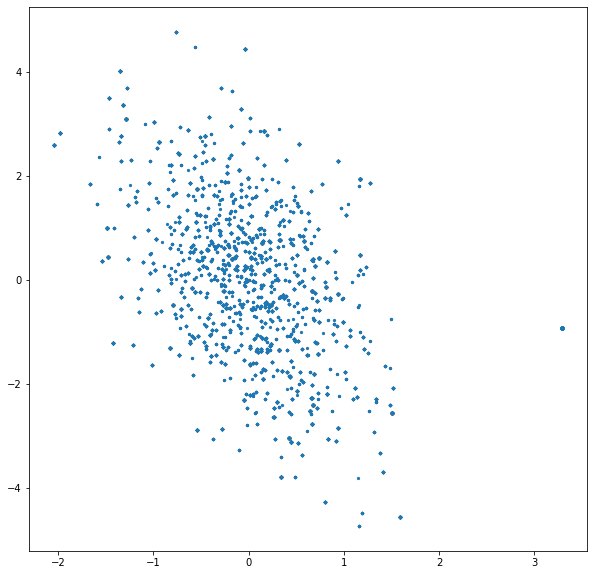

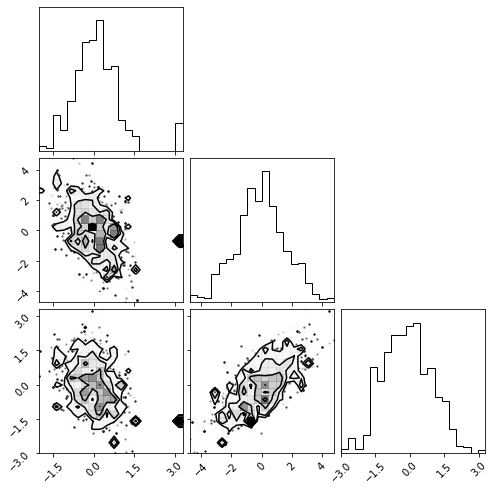

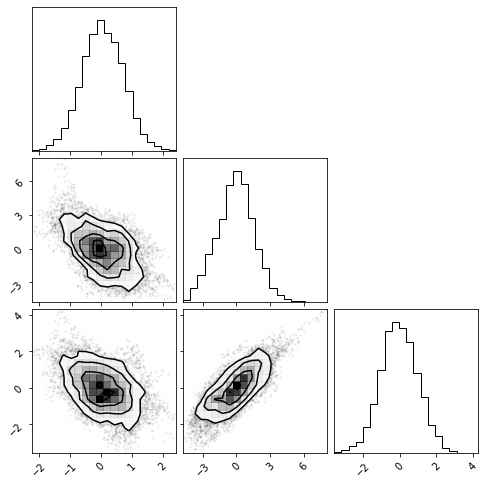

In [8]:
#plt.scatter(paths[:,0],paths[:,1],s=3)
#plt.scatter(anti_paths[:,0],anti_paths[:,1],s=3)
#plt.show()

plt.scatter(trace[:,0],trace[:,1],s=5)
#plt.scatter(trace2[:,0],trace2[:,1],s=5)
plt.show()

figure = corner.corner(trace)
figure2 = corner.corner(trace2)

In [9]:
def plot_conv(trace,dim,botlim,toplim, hmc, cov, calls):
    STDs, means = [], []
    for i in range(trace.shape[0]):
        STD=np.std(trace[:i,dim])
        STDs.append(STD/np.sqrt(cov[dim,dim]))
        means.append(np.mean(trace[:i,dim]))
    plt.plot(calls, STDs, label="STD/sigma hmc %s" %hmc)
    plt.plot(calls, means, label="mean hmc %s" %hmc)
    plt.hlines([0,1],0,calls[-1],ls=":", color="k")
    plt.legend()
    plt.title("Mean & STD vs L-calls for dim %.0f" %dim)
    #plt.ylim(botlim,toplim)
    
    #print(np.std(trace[:,dim]))
    

<ipython-input-10-836eba31ac76>:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov))
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[0.64424902        nan        nan]
 [       nan 1.60889198 1.10317143]
 [       nan 1.10317143 1.02505793]]


ValueError: x and y must have same first dimension, but have shapes (0,) and (10499,)

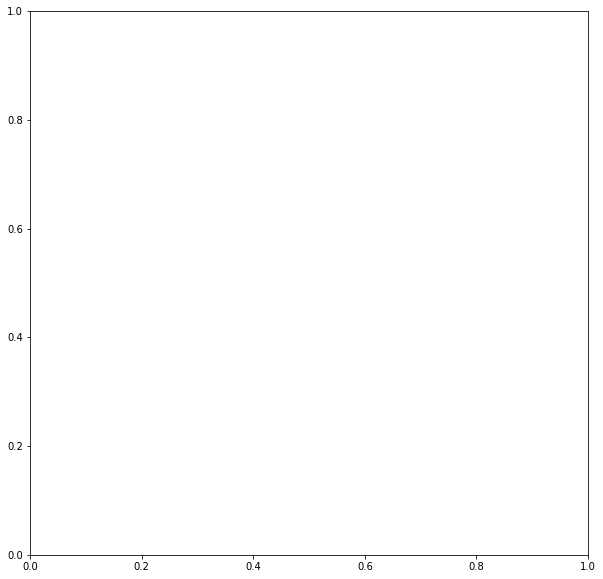

In [10]:
print(np.sqrt(cov))

plot_conv(trace,1,-1,1.5,1, cov, calls)
plot_conv(trace2,1,-1,1.5,2, cov, calls2)
plt.show()